In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# 设置中文字体（使用 macOS 自带字体）
plt.rcParams['font.sans-serif'] = ['PingFang HK', 'Songti SC', 'Arial Unicode MS', 'Heiti TC']  # 优先使用宋体-简
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

plt.style.use('ggplot')  # 设置图表风格
pd.set_option('display.max_columns', 50)  # 显示最多50列

# 3. 北京市住房价格预测

## 3.3. 数据集读取与划分

In [22]:
# 通过requests使用代理下载CSV
url = 'https://gist.githubusercontent.com/ffutop/870eb32f8ef6e1cfd1fc9e40d2fa63e5/raw/1cac678610a703bde5b366f2c312a211034af9b1/challenge-1-beijing.csv'

df = pd.read_csv(url)
df.head()

,公交,写字楼,医院,商场,地铁,学校,小区名字,建造时间,房型,楼层,每平米价格,面积
0,18,18,10,0,2,49,远洋山水,2006,2室1厅,26,60937,96
1,17,42,10,0,4,37,椿树园,1998,3室1厅,14,88686,130
2,18,36,9,0,1,24,永乐小区,1989,3室1厅,18,46621,74
3,15,49,13,0,2,45,主语家园,2007,4室3厅,2,86147,462
4,6,0,0,0,0,0,天伦锦城,2007,1室1厅,13,42500,64


In [23]:
print(f"数据维度: {df.shape}")
print("\n前5行数据:")
display(df.head())
print("\n数据摘要:")
display(df.info())
print("\n描述统计:")
display(df.describe(include='all'))

数据维度: (3000, 12)

前5行数据:


,公交,写字楼,医院,商场,地铁,学校,小区名字,建造时间,房型,楼层,每平米价格,面积
0,18,18,10,0,2,49,远洋山水,2006,2室1厅,26,60937,96
1,17,42,10,0,4,37,椿树园,1998,3室1厅,14,88686,130
2,18,36,9,0,1,24,永乐小区,1989,3室1厅,18,46621,74
3,15,49,13,0,2,45,主语家园,2007,4室3厅,2,86147,462
4,6,0,0,0,0,0,天伦锦城,2007,1室1厅,13,42500,64



数据摘要:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   公交      3000 non-null   int64 
 1   写字楼     3000 non-null   int64 
 2   医院      3000 non-null   int64 
 3   商场      3000 non-null   int64 
 4   地铁      3000 non-null   int64 
 5   学校      3000 non-null   int64 
 6   小区名字    3000 non-null   object
 7   建造时间    3000 non-null   int64 
 8   房型      3000 non-null   object
 9   楼层      3000 non-null   int64 
 10  每平米价格   3000 non-null   int64 
 11  面积      3000 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 281.4+ KB


None


描述统计:


,公交,写字楼,医院,商场,地铁,学校,小区名字,建造时间,房型,楼层,每平米价格,面积
count,3000.000000,3000.000000,3000.000000,3000.0,3000.000000,3000.000000,3000,3000.000000,3000,3000.000000,3000.000000,3000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,1226,NaN,30,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,天洋城,NaN,2室1厅,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,28,NaN,862,NaN,NaN,NaN
mean,7.813000,10.230000,3.411333,0.0,0.471667,11.289667,NaN,1995.139000,NaN,14.790333,58154.023333,131.831000
std,7.687158,18.486545,6.990548,0.0,0.884378,15.172777,NaN,140.599838,NaN,8.835896,28340.226155,123.213323
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,4.000000,NaN,1.000000,5000.000000,12.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,2001.000000,NaN,6.000000,36359.000000,71.000000
50%,7.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,2006.000000,NaN,14.000000,54522.000000,94.000000
75%,14.000000,10.000000,4.000000,0.0,1.000000,23.000000,NaN,2010.000000,NaN,22.000000,75644.250000,147.000000


In [24]:
target_column = "每平米价格"

features = df[df.select_dtypes(include=np.number).columns.drop([target_column])]
target = df[target_column]

features.columns

Index(['公交', '写字楼', '医院', '商场', '地铁', '学校', '建造时间', '楼层', '面积'], dtype='object')

In [25]:
pd.concat([features, target], axis=1).head()

,公交,写字楼,医院,商场,地铁,学校,建造时间,楼层,面积,每平米价格
0,18,18,10,0,2,49,2006,26,96,60937
1,17,42,10,0,4,37,1998,14,130,88686
2,18,36,9,0,1,24,1989,18,74,46621
3,15,49,13,0,2,45,2007,2,462,86147
4,6,0,0,0,0,0,2007,13,64,42500


In [26]:
from sklearn.model_selection import train_test_split

# 定义特征矩阵和目标变量
X = features  # 特征矩阵，包含所有数值型预测变量
y = target    # 目标变量，即"每平米价格"

# 将数据集拆分为训练集和测试集
# test_size=0.3: 30%的数据用于测试，70%用于训练
# random_state=42: 设置随机种子以确保结果可复现
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 打印各个数据集的形状，以验证拆分是否正确
# X_train: 训练集特征矩阵的形状 (行数,列数)
# y_train: 训练集目标变量的形状 (行数,)
# X_test: 测试集特征矩阵的形状 (行数,列数)
# y_test: 测试集目标变量的形状 (行数,)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2100, 9) (2100,) (900, 9) (900,)


## 3.4. 模型训练及预测

### Sklearn 进行线性回归预测

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

In [28]:
print("\n参数个数: ", len(model.coef_))

# 检查每个预测模型的系数：表示每个特征变化一个单位时，目标变量（每平米价格）的变化量
for name, coef in zip(X_train.columns, model.coef_):
    print(f"{name}: {coef}")

# 检查截距项
print("\nIntercept: ", model.intercept_)


参数个数:  9
公交: -458.04903694803835
写字楼: 239.74082733385274
医院: 527.4015370479757
商场: -8.446576771348191e-13
地铁: 1903.714501777691
学校: 389.36758062034033
建造时间: -6.079461601742742
楼层: 109.83878995174076
面积: 38.83877919439944

Intercept:  57328.912826981905


In [29]:
# 获取测试集的真实目标值（转为numpy数组，便于后续计算）
y_true = y_test.values

# 使用训练好的线性回归模型对测试集特征进行预测，得到预测值
y_preds = model.predict(X_test)


## 3.5. 模型评价

**平均绝对百分比误差 MAPE** : MAPE 是一个百分比值，因此比其他统计量更容易理解。例如，如果 MAPE 为 5，则表示预测结果较真实结果平均偏离 5%。MAPE 的计算公式如下：
$$\textrm{MAPE}(y, \hat{y} ) =
                    \frac{\sum_{i=1}^{n}{|\frac{y_{i}-\hat y_{i}}{y_{i}}|}}{n}
                    \times 100 \tag{1}$$

其中，$y_{i}$ 表示真实值，$\hat y_{i}$ 表示预测值，$n$ 则表示值的个数。MAPE 的值越小，说明预测模型拥有更好的精确度。

### 3.5.1 Sklearn

In [30]:
from sklearn import metrics

def evaluate_regression(y_true, y_preds):
    """计算并打印多个回归评估指标"""
    mse = metrics.mean_squared_error(y_true, y_preds)
    rmse = np.sqrt(mse)
    mae = metrics.mean_absolute_error(y_true, y_preds)
    mape = metrics.mean_absolute_percentage_error(y_true, y_preds)
    r2 = metrics.r2_score(y_true, y_preds)
    
    print("回归模型评估指标:")
    print(f"MSE:  {mse:,.4f}")
    print(f"RMSE: {rmse:,.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"MAPE:  {mape*100:.2f}%")
    print(f"R²:   {r2*100:.2f}%")
    
    return {"mse": mse, "rmse": rmse, "mae": mae, "r2": r2}

# 使用示例
metrics_dict = evaluate_regression(y_true, y_preds)

# MAE：衡量预测误差和绝对值大小的指标
# MSE：相比于MAE，MSE对大误差的惩罚更重，MSE会比MAE更大
# MAPE：模型的平均百分比误差，评估预测结果的相对准确性

回归模型评估指标:
MSE:  616,795,311.2921
RMSE: 24,835.3641
MAE:  19619.9207
MAPE:  46.96%
R²:   19.95%


#### 评估指标详解

这段代码是用于评估机器学习模型性能的，它计算了几个不同的回归评估指标：
1. **均方误差 (MSE, Mean Squared Error)：** 计算预测值与真实值差值的平方的平均值。由于平方操作，MSE对大误差的惩罚更重，因此MSE对大误差特别敏感。
   - 公式：$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$
   - 含义：值越小表示模型越精确；完美预测时MSE=0

2. **平均绝对误差 (MAE, Mean Absolute Error)：** MAE计算预测值与真实值之间的绝对差值的平均值。
   - 公式：$$ MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$
   - 含义：MAE比MSE对异常值更不敏感，提供更直观的误差度量

3. **平均绝对百分比误差 (MAPE, Mean Absolute Percentage Error)：** 计算预测值与真实值差值相对于真实值的百分比的平均值。

    - 公式：$$ MAPE = \frac{100\%}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| $$
    - 含义：误差相对于实际值的百分比。代码中乘以100并格式化为保留两位小数的百分比形式。

4. **决定系数 (R², R-squared)：** 衡量模型解释因变量变异程度的统计量。
    - 公式：$$  R^2 = 1 - \frac{残差平方和}{总平方和} = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$
    - 含义：R²衡量模型解释因变量变异性的程度。取值范围通常在0到1之间，越接近1表示模型的拟合效果越好。代码中将R²值乘以100并格式化为百分比形式。

#### 指标之间的关系

- **MSE vs MAE**：MSE由于平方项的存在，对大偏差的惩罚更为严厉，因此*MSE通常大于MAE*。
- **MAPE**：提供相对误差视角，对于房价预测等问题特别有用，因为它衡量的是预测与实际值的相对偏差。
- **R²**：衡量模型对数据变异性的解释能力，是了解模型总体表现的重要指标。


#### 评估指标结果解读
- MSE (均方误差): 616,795,311.29<br>
  - 这是一个很大的数值，表示预测值与实际值的平方差平均值很高
  - 由于平方运算，这个值通常会比较大，特别是对于房价这种数值较大的预测目标
  - 单独看这个数值不直观，需要结合其他指标和数据规模来理解
- MAE (平均绝对误差): 19,619.92
  - 表示模型预测的房价与实际房价平均相差约19,620元/平方米
  - 这是最直观的误差衡量，告诉你预测值平均偏离了多少
- MAPE (平均绝对百分比误差): 46.96%
  - 表示预测值平均偏离实际值的程度为46.96%
  - 这是一个相对较高的误差率，意味着模型平均会高估或低估接近一半的房价
  - 通常，MAPE低于10%被认为是非常好的预测，而超过40%则表示预测精度较低
- R² (决定系数): 19.95%
  - 表示模型只能解释约19.95%的房价变异
  - 通常R²接近1(或100%)表示模型拟合得很好
  - 19.95%是一个较低的值，说明模型对房价的预测能力有限，还有约80%的变异无法被现有特征解释
- 综合解读：<br>
这个模型的预测精度相对较低，平均误差接近50%。模型对数据的拟合度不高，只能解释约20%的房价变化。模型预测的房价与实际房价平均相差约19,620元/平方米。可能需要添加更多相关特征、调整模型参数或尝试更复杂的模型来提高预测精度。



In [31]:
metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 '

### 3.5.2 statsmodels

In [32]:
import statsmodels.api as sm

# 添加常数项，以拟合截距
X_train_const = sm.add_constant(X_train)

# 创建模型并拟合
model2 = sm.OLS(y_train, X_train_const)
result2 = model2.fit()
# Coef: 显示每个自变量的估计系数，即每个自变量对因变量的影响大小
print("Model parameters:", result2.params)

# 输出模型摘要
print(result2.summary())

Model parameters: const    5.732891e+04
公交      -4.580490e+02
写字楼      2.397408e+02
医院       5.274015e+02
商场       9.791973e-11
地铁       1.903715e+03
学校       3.893676e+02
建造时间    -6.079462e+00
楼层       1.098388e+02
面积       3.883878e+01
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  每平米价格   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     65.11
Date:                Thu, 07 Aug 2025   Prob (F-statistic):           1.58e-95
Time:                        15:37:51   Log-Likelihood:                -24293.
No. Observations:                2100   AIC:                         4.860e+04
Df Residuals:                    2091   BIC:                         4.865e+04
Df Model:                           8                                         
Covariance Type:            nonrobus

:::{note}
#### 为什么 statsmodels 和 sklearn 计算的参数系数不一致？

1. **常数项（截距）处理方式不同**  
   - `sklearn` 的 `LinearRegression` 默认不会自动为特征加上常数项（截距），需要手动指定 `fit_intercept=True`（默认是 True，但如果你传入已经加了常数项的 X，结果会出错）。
   - `statsmodels` 的 `OLS` 则需要你手动用 `sm.add_constant(X)` 添加常数项，否则不会有截距。
   - 如果一个加了常数项，一个没加，系数就会不同。

2. **数据预处理差异**  
   - 如果对 X 做了标准化、归一化、缺失值填充等预处理，顺序和方法不同也会导致系数不同。
   - 比如 `sklearn` 训练前常用 `StandardScaler`，而 `statsmodels` 通常直接用原始数据。

3. **默认参数和实现细节**  
   - `sklearn` 的 `LinearRegression` 默认用最小二乘法（和 OLS 理论上一致），但底层实现和数值精度可能略有差异。
   - `statsmodels` 也用最小二乘法，但输出更偏重统计分析（如 t 检验、p 值等）。

4. **特征顺序和数据类型**  
   - 特征顺序、数据类型（如 int/float）、是否有多余的列（如重复的常数项）都会影响系数。

**结论**：  
只要数据、特征、常数项处理完全一致，`sklearn` 和 `statsmodels` 的线性回归系数理论上应该一样。如果不一致，通常是因为常数项（截距）处理方式不同，或者数据预处理不一致。建议检查：
- 是否都加了常数项，且只加了一次
- 输入数据是否完全一致
- 没有多余的预处理或特征
:::

:::{note}
#### 线性回归模型结果解读与分析

##### 1. 模型系数解读

模型参数表示每个自变量对因变量(每平米价格)的影响：

$$ 每平米价格 = 57328.91 - 458.05 \times 公交 + 239.74 \times 写字楼 + 527.40 \times 医院 + 0 \times 商场 + 1903.72 \times 地铁 + 389.37 \times 学校 - 6.08 \times 建造时间 + 109.84 \times 楼层 + 38.84 \times 面积 $$

###### 系数含义
- **正系数**: 该变量每增加一个单位，房价预计上涨对应的系数值
  - 地铁: 每多一个地铁站，每平米价格上涨约1670元
  - 学校: 每多一个学校，每平米价格上涨约454元
  - 医院: 每多一个医院，每平米价格上涨约427元
  - 写字楼: 每多一个写字楼，每平米价格上涨约255元
  - 楼层: 每增加一层，每平米价格上涨约71元
  - 面积: 每增加一平方米，每平米价格上涨约39元

- **负系数**: 该变量每增加一个单位，房价预计下降对应的系数值
  - 公交: 每多一个公交站，每平米价格下降约537元
  - 建造时间: 每增加一年，每平米价格下降约4.3元

- **几乎为零的系数**:
  - 商场: 系数接近0 (1.25e-12)，表明商场数量对房价几乎没有影响

##### 2. 模型整体评估

###### 拟合优度
- **R²**: 0.201 (20.1%)
- **调整后的R²**: 0.198 (19.8%)
  
这表明模型仅解释了大约20%的房价变异，拟合效果较弱。

###### 统计显著性
- **F统计量**: 93.78
- **p值**: 1.96e-139

F统计量的p值极低，表明模型整体上具有统计显著性，即至少有一个自变量对因变量有显著影响。

###### 模型问题警告

这表明模型存在**强多重共线性**问题，即一些自变量之间可能高度相关，导致模型不稳定。

##### 3. 主要问题与改进建议

###### 多重共线性问题
自变量之间可能存在高度相关性，如地铁站、公交站和商场可能位置接近，形成共线性。

**建议改进**:
- 使用主成分分析(PCA)降维
- 使用岭回归(Ridge)或LASSO等正则化方法
- 删除部分高度相关的变量
- 构建复合指标替代原始变量

###### 模型解释力不足
模型仅解释了约20%的房价变异，表明可能缺少重要的解释变量。

**建议改进**:
- 增加更多可能影响房价的变量(如教育质量、治安情况、绿化率等)
- 考虑非线性关系(如使用多项式特征)
- 尝试更高级的模型(如随机森林、梯度提升树等)

###### 异常值影响
标准线性回归对异常值敏感，可能导致系数估计偏差。

**建议改进**:
- 检测并处理异常值
- 使用稳健回归方法
- 对连续变量进行变换(如对数变换)

##### 4. 业务解读

###### 关键发现
1. **地铁最重要**: 地铁站的增加显著提高房价，是影响房价的最重要因素
2. **公交站负面影响**: 公交站数量增加反而降低房价，可能因为公交站带来的噪音和拥堵
3. **学校和医院正面影响**: 教育和医疗资源接近性对房价有正面影响
4. **楼层高度正相关**: 高楼层的房价更高，符合"高层视野好"的常识
5. **建筑年龄负相关**: 较新的建筑房价更高，但影响相对较小

###### 潜在的商业应用
- 房地产开发商可优先考虑地铁站附近的地块
- 购房者在有限预算下可优先考虑学校和医院附近，但不必过于追求高楼层
- 房产投资者可关注即将新建地铁线路附近的区域，预期未来升值
:::

### 3.5.3 pycaret

In [33]:
from pycaret.regression import *
exp_setup = setup(data = df,  target = '每平米价格')
all_metrics = get_metrics()

,Description,Value
0,Session id,3084
1,Target,每平米价格
2,Target type,Regression
3,Original data shape,"(3000, 12)"
4,Transformed data shape,"(3000, 12)"
5,Transformed train set shape,"(2100, 12)"
6,Transformed test set shape,"(900, 12)"
7,Numeric features,9
8,Categorical features,2
9,Preprocess,True


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,12038.3376,340168195.1542,18443.6492,0.6197,0.3589,0.2944
1,13958.7685,524923364.9815,22911.2061,0.4573,0.4064,0.2875
2,11667.4424,340153495.8376,18443.2507,0.6100,0.8083,0.2437
3,12454.3422,298132045.2243,17266.5007,0.6659,0.4732,0.2954
4,11350.6165,259446611.4915,16107.3465,0.6276,0.4504,0.3001
5,12638.2767,478286807.6492,21869.7693,0.4572,0.3895,0.3010
6,10123.0991,226230699.8821,15040.9674,0.6711,0.5060,0.2807
7,11396.9545,257485845.1015,16046.3655,0.6508,0.4123,0.2786
8,11630.9976,270358560.1397,16442.5837,0.6308,0.3915,0.3244


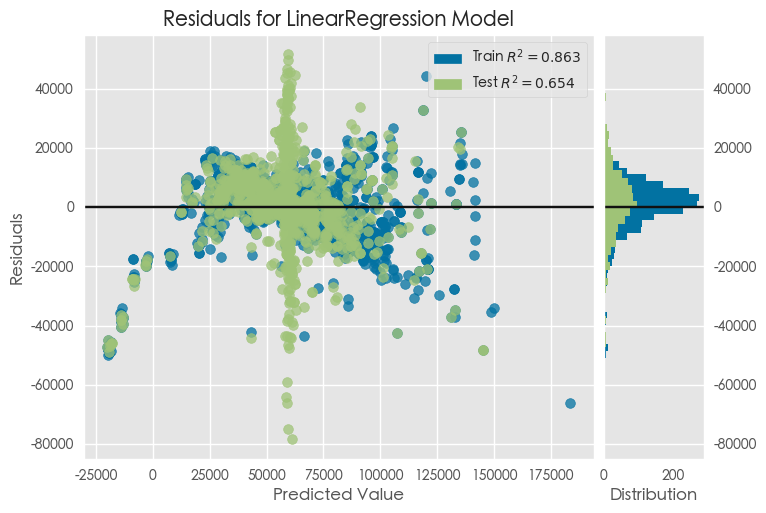

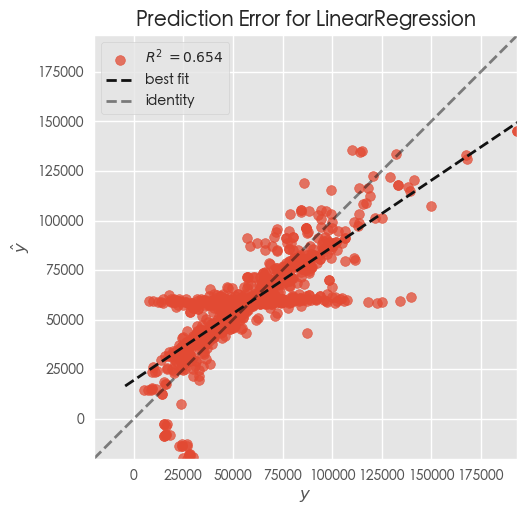

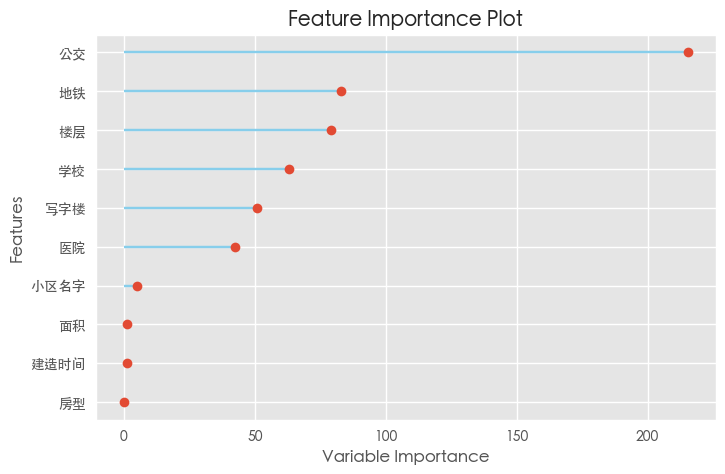

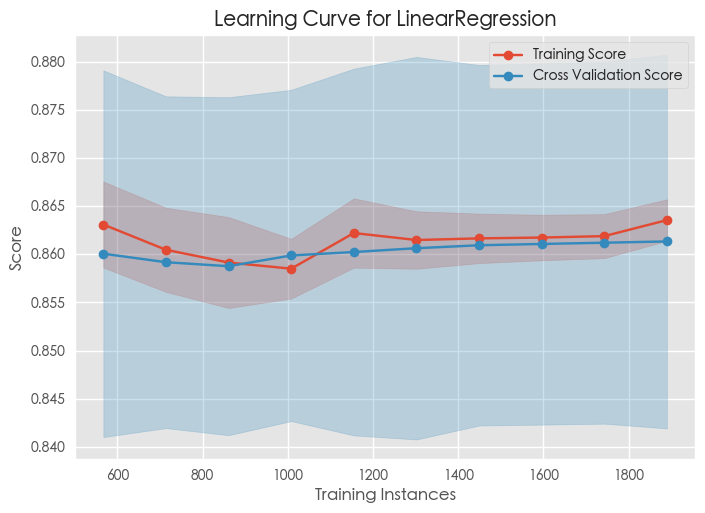

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8517.9270,286637720.6614,16930.3786,0.6795,0.3037,0.1905
1,11188.8810,496845042.9159,22290.0212,0.4863,0.3195,0.2012
2,8533.1651,294483822.7344,17160.5310,0.6623,0.2456,0.1405
3,9348.4651,257835797.6471,16057.2662,0.7111,0.2776,0.1887
4,9184.3048,249106361.7333,15783.1037,0.6424,0.3223,0.2289
5,10374.0508,449321402.2233,21197.2027,0.4901,0.3405,0.2385
6,7588.0119,206105582.2869,14356.3778,0.7004,0.2782,0.1787
7,7648.7897,190798378.2811,13812.9786,0.7412,0.2577,0.1601
8,8368.3825,213718426.5243,14619.1117,0.7081,0.3124,0.2222


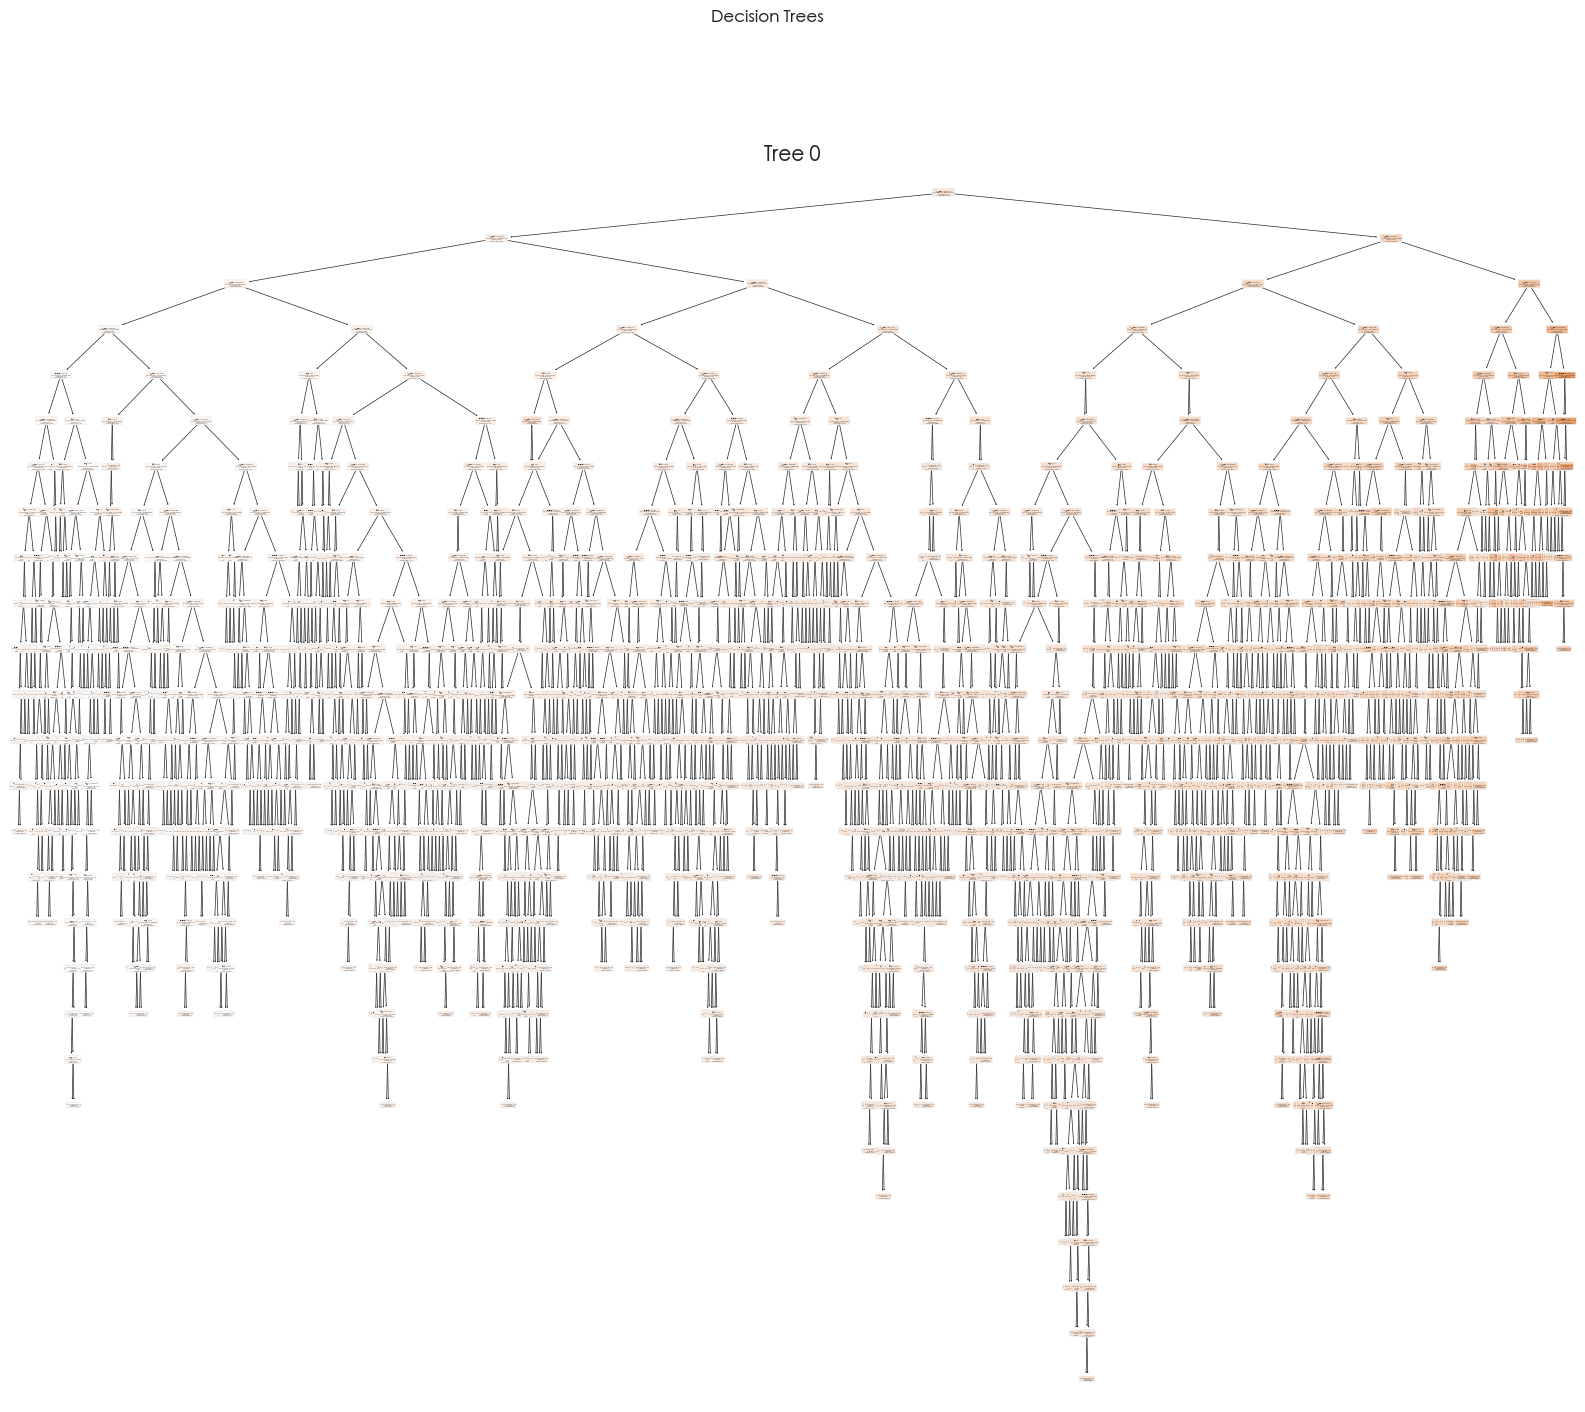

In [34]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['Heiti TC']
matplotlib.rcParams['font.family'] = ['sans-serif']

# 创建模型
lr_model = create_model('lr')  # 线性回归模型

# 残差图 - 检查误差分布
plot_model(lr_model, plot='residuals')

# 预测误差图 - 查看预测与实际值的对比
plot_model(lr_model, plot='error')

# 特征重要性图 - 了解哪些特征影响最大，使用PyCaret的plot_model时指定字体
plot_model(lr_model, plot='feature')

# 学习曲线 - 评估模型的泛化能力
plot_model(lr_model, plot='learning')

# 决策树可视化(如果使用决定树模型)
dt_model = create_model('dt')
plot_model(dt_model, plot='tree')

In [35]:
compare_models(include = ['lr', 'xgboost', 'rf', 'et', 'lightgbm'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,8919.8456,274618213.2554,16349.7530,0.6684,0.2910,0.1964,0.1080
et,Extra Trees Regressor,8708.0247,274976781.8596,16361.1810,0.6679,0.2909,0.1913,0.0660
xgboost,Extreme Gradient Boosting,8863.0586,275486402.1647,16376.8693,0.6676,0.2904,0.1949,0.0370
lightgbm,Light Gradient Boosting Machine,9319.0704,278951455.1224,16479.4447,0.6631,0.2965,0.2076,0.3350
lr,Linear Regression,11885.1445,325616923.1816,17872.6626,0.6054,0.4562,0.2932,0.0260


RandomForestRegressor(n_jobs=-1, random_state=3084)

## Shap

In [36]:
import shap

print("Model coefficients:\n")
for i in range(X.shape[1]-1):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

公交 = -458.04904
写字楼 = 239.74083
医院 = 527.40154
商场 = -0.0
地铁 = 1903.7145
学校 = 389.36758
建造时间 = -6.07946
楼层 = 109.83879


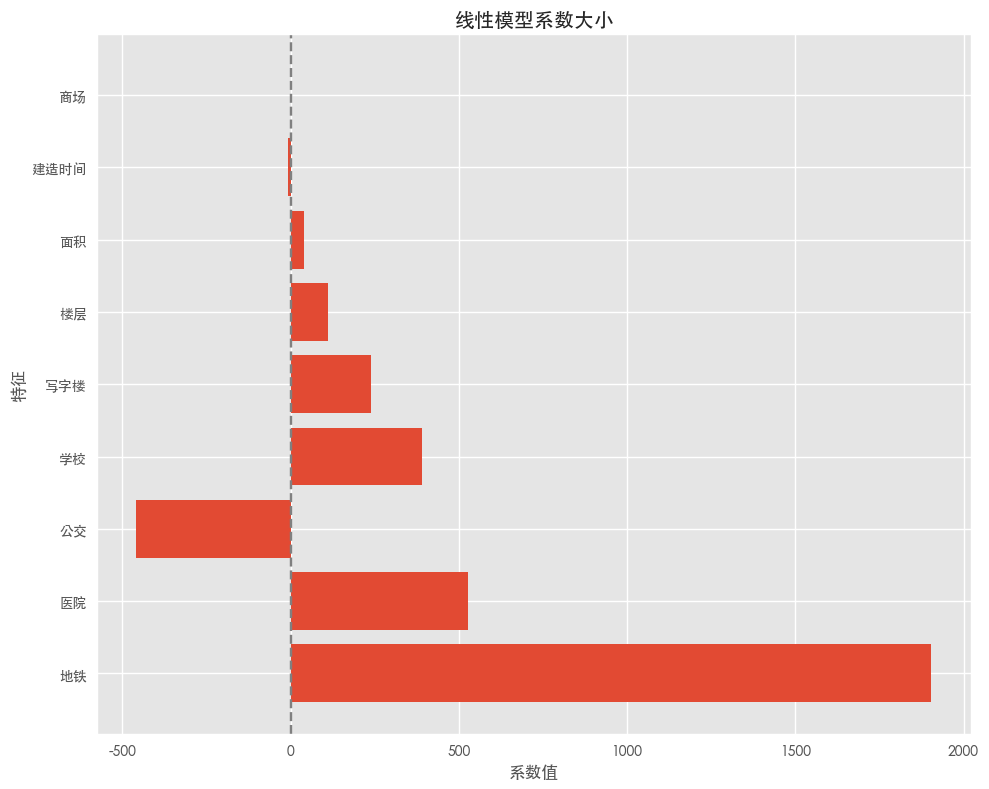

In [37]:
# 1. 系数可视化
# 最直接的方法是可视化模型系数，展示各特征对预测的影响大小和方向。

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 提取系数
coef = model.coef_
feature_names = X_test.columns

# 创建系数DataFrame并排序
coef_df = pd.DataFrame({'特征': feature_names, '系数': coef})
coef_df = coef_df.reindex(coef_df['系数'].abs().sort_values(ascending=False).index)

# 绘制水平条形图
plt.figure(figsize=(10, 8))
plt.barh(coef_df['特征'], coef_df['系数'])
plt.xlabel('系数值')
plt.ylabel('特征')
plt.title('线性模型系数大小')
plt.axvline(x=0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

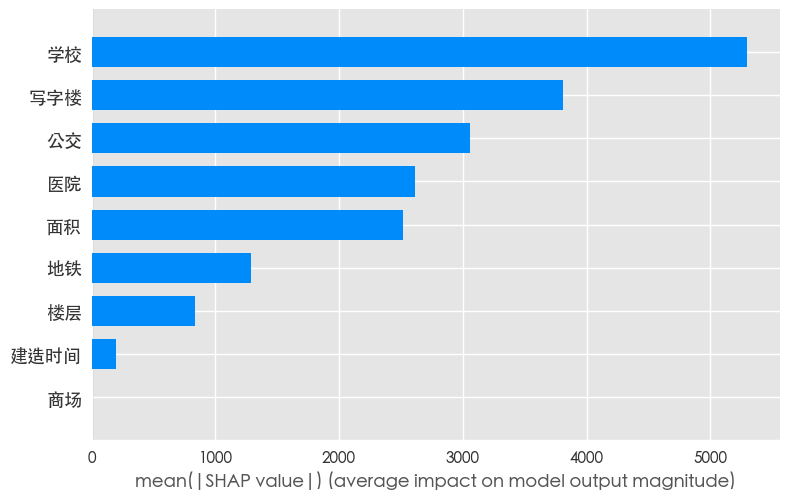

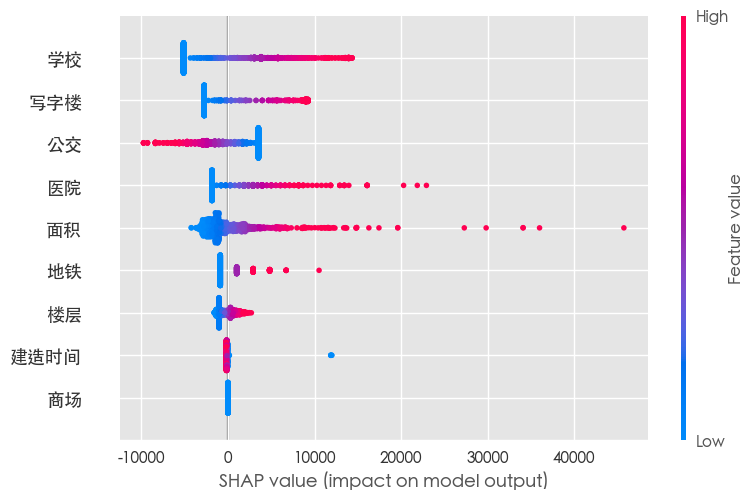

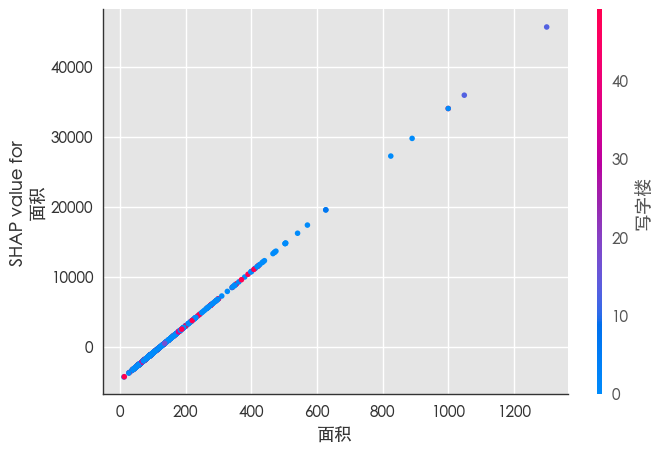

In [38]:
# 2. SHAP值可视化
# SHAP值提供了更精细的特征贡献分析，特别是对多样本的整体解释。

import shap

# 创建解释器
explainer = shap.LinearExplainer(model, X_test)
shap_values = explainer.shap_values(X_test)

# 摘要图 - 展示所有特征的整体影响
shap.summary_plot(shap_values, X_test, plot_type="bar")  # 条形图版本
shap.summary_plot(shap_values, X_test)  # 点图版本

# 特征依赖图 - 分析单个特征效应
shap.dependence_plot("面积", shap_values, X_test)  # 替换"地铁"为您的特征名

In [39]:
type(features)

pandas.core.frame.DataFrame

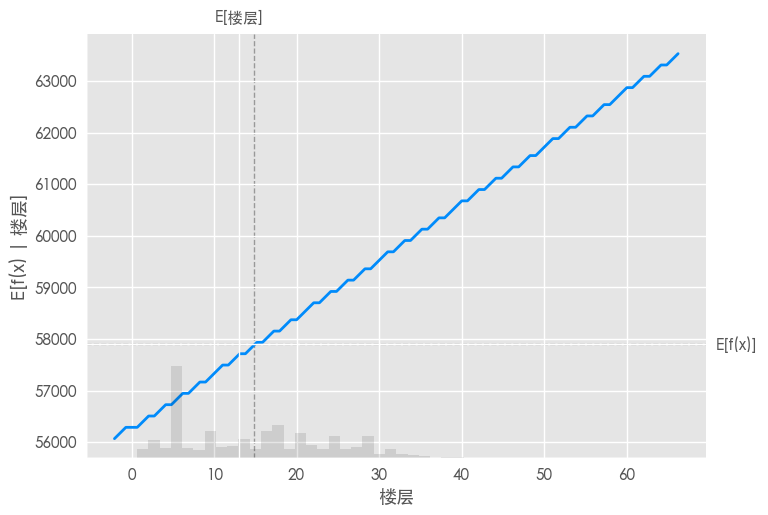

In [40]:
# features = pd.DataFrame(features, columns=["楼层"])  # 根据实际情况修改列名

shap.partial_dependence_plot(
    "楼层",
    model.predict,
    features,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

### 常用机器学习模型评估方式
#### 分类模型评估
准确率(Accuracy): 正确预测的比例
精确率(Precision): 预测为正的样本中真正为正的比例
召回率(Recall): 实际为正的样本中被正确预测的比例
F1分数: 精确率和召回率的调和平均
ROC曲线与AUC: 评估模型的区分能力
混淆矩阵: 直观展示分类结果的各类错误
对数损失(Log Loss): 评估概率预测的不确定性
#### 回归模型评估
均方误差(MSE): 预测值与真实值差的平方的平均值
均方根误差(RMSE): MSE的平方根，与因变量同单位
平均绝对误差(MAE): 预测值与真实值的绝对差的平均值
平均绝对百分比误差(MAPE): 相对误差的平均
R平方(R²): 模型解释的方差比例
调整R平方: 考虑特征数量的R²修正版
#### 交叉验证技术
K折交叉验证: 将数据分成K份，轮流用K-1份训练，1份测试
留一交叉验证(LOOCV): 每次留一个样本作为测试集
分层交叉验证: 保持各折中类别分布一致
时间序列交叉验证: 考虑时间顺序的特殊交叉验证方法
#### 其他评估技术
学习曲线: 评估模型随训练集大小变化的表现
验证曲线: 评估模型随超参数变化的表现
Bootstrap: 通过重采样评估模型稳定性
A/B测试: 在实际环境中比较模型效果
残差分析: 检查残差分布评估模型假设
#### 业务驱动的评估
业务KPI改善: 如转化率、留存率提升
模型收益(Gain)和提升度(Lift): 相对于基准的改进
模型解释性: 特征重要性、SHAP值等可解释指标
计算效率: 推理时间、资源消耗等

### 工业界模型评估指标汇总
工业界评估机器学习模型时，通常会关注以下几类指标：
#### 1. 性能指标
##### 分类模型
准确率 (Accuracy): 正确预测的比例
精确率 (Precision): 预测为正例中真正例的比例
召回率 (Recall): 真实正例中被正确预测的比例
F1分数: 精确率和召回率的调和平均
AUC-ROC: ROC曲线下面积，评估分类器区分能力
PR-AUC: 精确率-召回率曲线下面积
混淆矩阵: 预测与实际标签的对比矩阵
##### 回归模型
均方误差 (MSE): 预测值与真实值差异的平方的平均值
均方根误差 (RMSE): MSE的平方根，与目标值同单位
平均绝对误差 (MAE): 误差绝对值的平均
平均绝对百分比误差 (MAPE): 相对误差的平均
R²: 模型解释的方差比例
调整后的R²: 考虑特征数量的R²校正版本
#### 2. 业务价值指标
收益提升 (Gain): 模型带来的额外收益
投资回报率 (ROI): 模型成本与收益比
成本节约: 模型减少的成本开支
客户留存改善: 模型提高的客户留存率
提升度 (Lift): 模型相较随机分配的改进比例
业务KPI改善: 如点击率、转化率提升百分比
#### 3. 计算效率指标
推理时间: 单次预测所需的时间
吞吐量: 单位时间内可处理的预测量
内存占用: 模型运行所需的内存资源
延迟: 从输入到输出的时间延迟
CPU/GPU使用率: 计算资源使用效率
批处理效率: 批量处理时的资源利用情况
#### 4. 鲁棒性指标
数据漂移检测: 模型对输入分布变化的敏感度
概念漂移检测: 模型对目标关系变化的敏感度
异常值敏感性: 模型对异常数据的稳定性
特征缺失容忍度: 处理特征缺失的能力
对抗样本鲁棒性: 对恶意构造输入的抵抗能力
#### 5. 公平性与伦理指标
人口统计平等: 不同人群的预测表现差异
等比例分类: 不同敏感群体的分类错误率比例
公平性评分: 针对特定伦理考量的综合评分
偏见检测指标: 检测并量化模型偏见
#### 6. 可解释性指标
特征重要性: 不同特征对预测的贡献程度
部分依赖图: 特定特征与预测结果的关系
SHAP值: 基于博弈论的特征贡献分析
局部解释一致性: 局部解释的稳定性
#### 7. 生产系统指标
模型版本跟踪: 不同版本模型的表现对比
再训练频率: 模型更新的周期和触发条件
数据质量监控: 输入数据质量的变化监测
预测分布监控: 预测值分布的稳定性追踪
模型健康度: 综合评估模型运行状态的指标
工业界通常会根据具体业务场景和模型类型，从上述指标中选择最相关的几项进行重点监控和优化。